In [37]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

In [2]:
#Reading necessary data files
df= pd.read_csv("all3_ML.csv")

sono= pd.read_csv("Sonoma_ML.csv")
coast= pd.read_csv("Coast_ML.csv")
valley= pd.read_csv("Valley_ML.csv")

In [63]:
df.iloc[:20,0:2]

,Unnamed: 0,Rating
0,1996,89.000000
1,1997,87.900000
2,1998,87.666667
3,1999,87.258065
4,2000,87.888889
5,2001,87.972222
6,2002,86.671429
7,2003,87.055556
8,2004,86.980000
9,2005,87.432836


In [22]:
y =  df["Rating"]

In [24]:
X = df.iloc[:,2:] #Features start on column 2

In [29]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #Filling in NaNs with the mean of the column
imp.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [30]:
fillX = imp.transform(X)

In [31]:
fillX

array([[  8.96      ,  49.1       ,  40.5       , ...,  50.4       ,
         42.        ,  58.8       ],
       [ 10.35      ,  48.8       ,  41.1       , ...,  47.7       ,
         37.6       ,  57.8       ],
       [ 12.        ,  50.1       ,  42.9       , ...,  44.7       ,
         33.3       ,  56.        ],
       ..., 
       [  1.318     ,  32.15      ,  26.7       , ...,  31.9       ,
         24.7       ,  39.1       ],
       [  1.31833333,  36.4       ,  31.7       , ...,  38.7       ,
         33.        ,  44.4       ],
       [  1.4325    ,  37.4       ,  32.2       , ...,  38.1       ,
         32.3       ,  43.8       ]])

In [116]:
svr_lin = SVR(kernel='linear', C=1)

In [117]:
y_lin = svr_lin.fit(fillX, y)

In [118]:
y_predict = y_lin.predict(fillX)

In [39]:
years = list(range(1996,2016))

In [47]:
len(y_predict[:20])

20

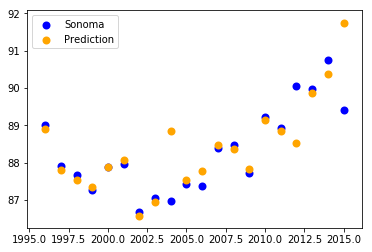

In [119]:
plt.close("all")


plt.scatter(years, df.iloc[:20,1], color="b", lw=2, label="Sonoma")
plt.scatter(years, y_predict[:20], color="orange", lw=2, label="Prediction")

plt.legend()
plt.show()

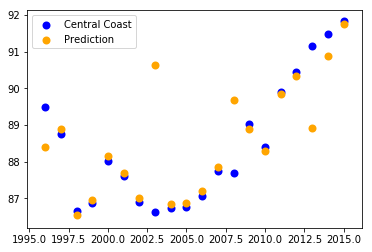

In [120]:
plt.close("all")


plt.scatter(years, df.iloc[20:40,1], color="b", lw=2, label="Central Coast")
plt.scatter(years, y_predict[20:40], color='orange', lw=2, label="Prediction")


plt.legend()
plt.show()

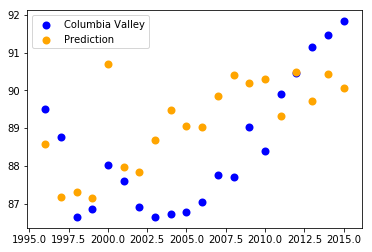

In [121]:
plt.close("all")


plt.scatter(years, df.iloc[20:40,1], color="b", lw=2, label="Columbia Valley")
plt.scatter(years, y_predict[40:60], color='orange', lw=2, label="Prediction")



plt.legend()
plt.show()